## Evaluate YAMNET

#### Setup

In [1]:
import os
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
os.sys.path.append('./audioset/yamnet')
import params
from datagen_yamnet import DataGenerator, get_files_and_labels

model = tf.keras.models.load_model("I:/model/vehicle/v1/saved_models/model.h5")
test_dir = "I:/datasets/vehicle/dataset/test_set/npy/"

#### Get test data files and labels

In [2]:
files_test, labels_test, _, _, class_dict = get_files_and_labels(test_dir, typ='npy', train_split=1)
print(labels_test)
class_dict_rev = {(str(v)): k for k, v in class_dict.items()}

In [3]:
batch_size = 1

test_generator = DataGenerator(files_test,
                                labels_test,
                                shuffle=False,
                                batch_size=batch_size)

#### Evaluate

In [4]:
evaluate = model.evaluate(test_generator, verbose=1)
print("Evaluate value:", evaluate)

3671/3671 [==============================] - 108s 29ms/step - loss: 0.1504
Evaluate value: 0.15037113428115845


#### Predict

In [13]:
predict = model.predict(test_generator, verbose=1)
print("Predict value:", predict)

3671/3671 [==============================] - 15s 4ms/step
Predict value: [[9.9997377e-01 2.6183721e-05]
 [9.9996185e-01 3.8194168e-05]
 [8.1758207e-01 1.8241796e-01]
 ...
 [6.7163698e-02 9.3283629e-01]
 [1.1228709e-04 9.9988770e-01]
 [8.3747018e-06 9.9999166e-01]]


#### AUC

In [14]:
y_true = []
for i, ID in enumerate(test_generator.list_IDs):
    class_id = ID.split('/')[-2]
    y_true.append(class_dict_rev.get(class_id))
y_true = np.array(y_true)
y_pred = np.array(predict[:,1])

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
auc_value = metrics.auc(fpr, tpr)
print(f"AUC: {auc_value}")

AUC: 0.9860591497754295


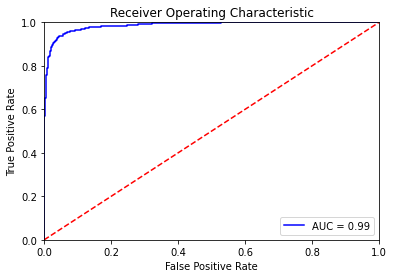

In [7]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_value)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('yamnet.png')
plt.show()

#### Precision and Recall Curve

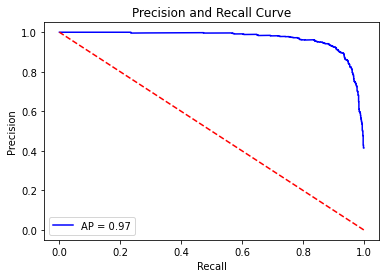

In [15]:
avg_precision_score = metrics.average_precision_score(y_true, y_pred)

precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_pred)

plt.title('Precision and Recall Curve')
plt.plot(recall, precision, 'b', label = 'AP = %0.2f' % avg_precision_score)
plt.legend(loc = 'lower left')
plt.plot([1, 0], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('yamnet-prec.png')
plt.show()

#### Calcurate confusion metrix

In [10]:
y_pred = np.argmax(predict, axis=1)
cfmx = metrics.confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(cfmx)

tn, fp, fn, tp = cfmx.ravel()
print(f"true positive: {tp}, true negative: {tn}, false positive: {fp}, false negative: {fn}")

Confusion matrix:
[[2603   71]
 [  99  898]]
true positive: 898, true negative: 2603, false positive: 71, false negative: 99


In [11]:
report = metrics.classification_report(y_true, y_pred)
print(report)

precision    recall  f1-score   support

           0       0.96      0.97      0.97      2674
           1       0.93      0.90      0.91       997

    accuracy                           0.95      3671
   macro avg       0.95      0.94      0.94      3671
weighted avg       0.95      0.95      0.95      3671

